In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
dataUK = df[(df['job_country'] == 'United Kingdom')].copy()

In [3]:
data_UK_skills = dataUK.explode('job_skills')

In [10]:
data_UK_skills[["job_title_short","job_skills"]]

,job_title_short,job_skills
15,Data Engineer,python
15,Data Engineer,sql
15,Data Engineer,power bi
45,Senior Data Analyst,sql
45,Senior Data Analyst,python
...,...,...
785642,Data Engineer,qlik
785642,Data Engineer,confluence
785642,Data Engineer,jira
785676,Senior Data Scientist,r


In [15]:
UK_data_skills_count = data_UK_skills.groupby(['job_skills','job_title_short']).size()

UK_data_skills_count = UK_data_skills_count.reset_index(name='skill_counts')

# Analaysing the Skills in the UK Job Market (test)
UK_data_skills_count.sort_values(by='skill_counts', ascending=False).head(10)

,job_skills,job_title_short,skill_counts
1163,sql,Data Engineer,7050
915,python,Data Engineer,6462
916,python,Data Scientist,6329
88,azure,Data Engineer,4865
1162,sql,Data Analyst,4467
315,excel,Data Analyst,4274
1164,sql,Data Scientist,4009
78,aws,Data Engineer,3903
862,power bi,Data Analyst,2853
947,r,Data Scientist,2657


In [ ]:
job_titles = ["Data Scientist", "Data Analyst", "Data Engineer"] # Top 3 job titles in the UK job market

job_titles = sorted(job_titles) # Limiting to first 3 job titles for visualization

/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_39908/1292882813.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='skill_counts', y='job_skills', ax=ax[i], palette='viridis')
/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_39908/1292882813.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='skill_counts', y='job_skills', ax=ax[i], palette='viridis')
/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_39908/1292882813.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset

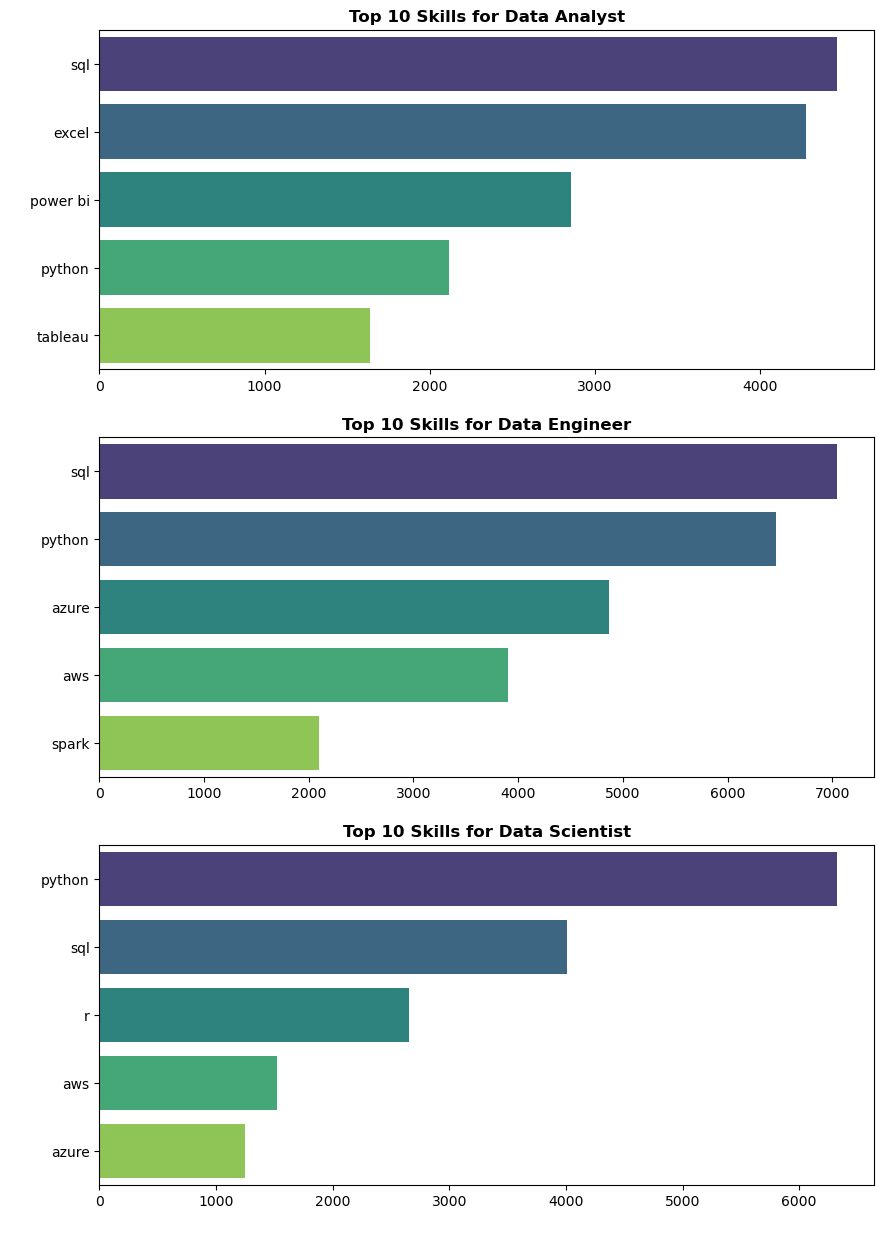

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 15))

for i, job_title in enumerate(job_titles):
    subset = UK_data_skills_count[UK_data_skills_count['job_title_short'] == job_title]
    subset = subset.sort_values(by='skill_counts', ascending=False).head(5)
    #used seaborn for better visualization
    sns.barplot(data=subset, x='skill_counts', y='job_skills', ax=ax[i], palette='viridis',)
    ax[i].set_title(f'Top 10 Skills for {job_title}', weight='bold')
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')



In [39]:
#utilising percentages 
UK_job_title_count = dataUK["job_title_short"].value_counts().reset_index(name = "Jobs Total")

In [60]:
UK_skill_percentages = pd.merge(UK_data_skills_count, UK_job_title_count, how = "left",on = "job_title_short")

UK_skill_percentages["skill_percentage"] = 100 * UK_skill_percentages["skill_counts"] / UK_skill_percentages["Jobs Total"]
UK_skill_percentages.head(5)

,job_skills,job_title_short,skill_counts,Jobs Total,skill_percentage
0,airflow,Business Analyst,1,827,0.120919
1,airflow,Cloud Engineer,6,193,3.108808
2,airflow,Data Analyst,41,10482,0.391147
3,airflow,Data Engineer,1062,11807,8.994664
4,airflow,Data Scientist,141,9148,1.541321


/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_39908/2513098291.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='skill_percentage', y='job_skills', ax=ax[i], palette='viridis')
/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_39908/2513098291.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticklabels(), fontstyle='italic')
/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_39908/2513098291.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='skill_percentage', y='job_skills', ax=ax[i], palette='viridis')
/v

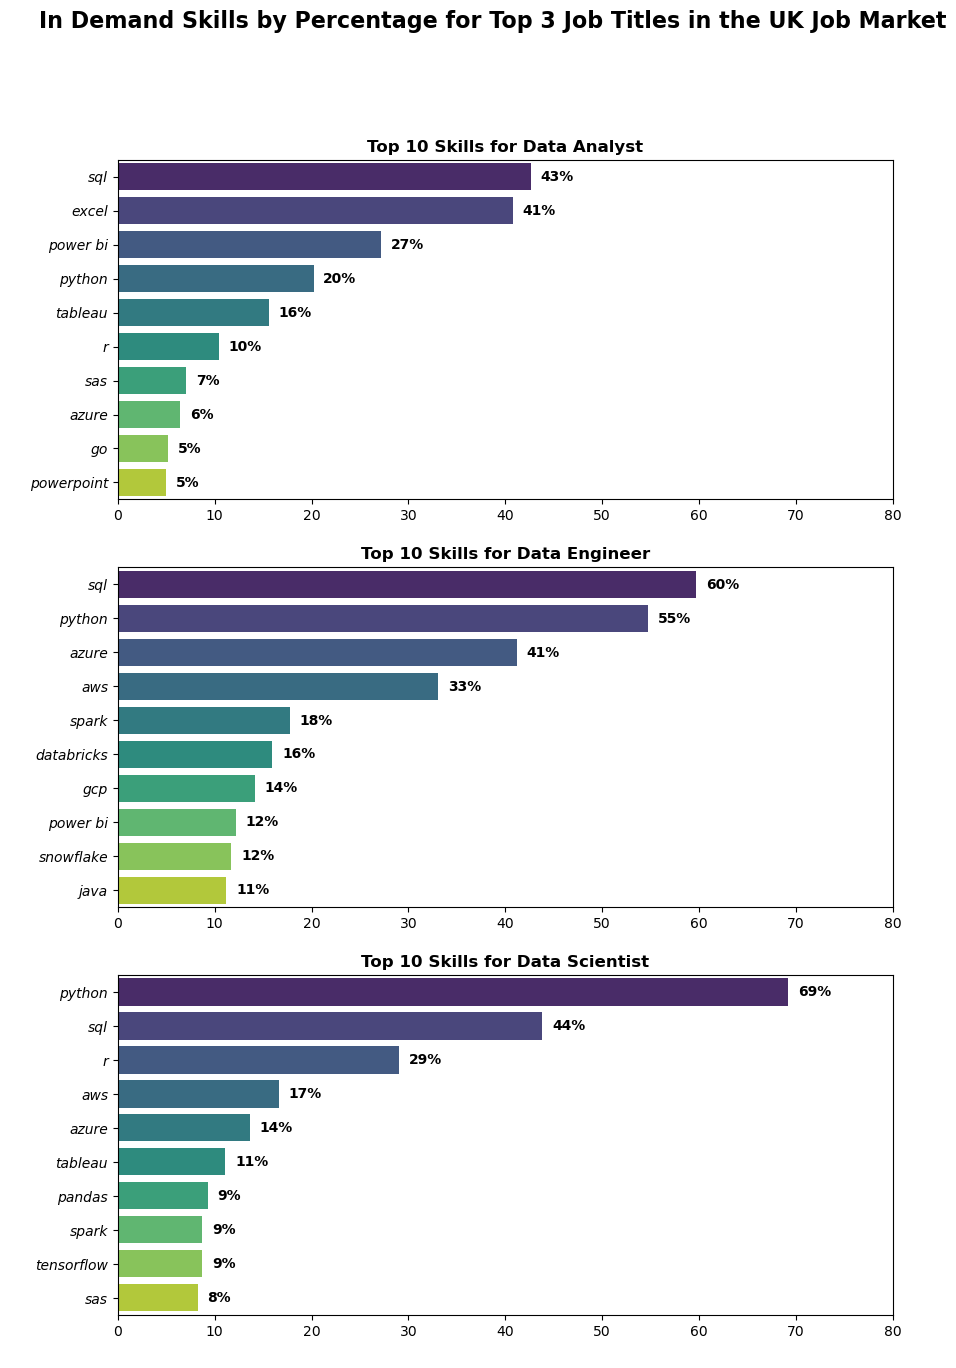

In [63]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 15))

for i, job_title in enumerate(job_titles):
    subset = UK_skill_percentages[UK_skill_percentages['job_title_short'] == job_title]
    subset = subset.sort_values(by='skill_counts', ascending=False).head(10)
    #used seaborn for better visualization
    sns.barplot(data=subset, x='skill_percentage', y='job_skills', ax=ax[i], palette='viridis')
    ax[i].set_title(f'Top 10 Skills for {job_title}', weight='bold')
    ax[i].set_xlim(0, 80)
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_yticklabels(ax[i].get_yticklabels(), fontstyle='italic')
    plt.suptitle('In Demand Skills by Percentage for Top 3 Job Titles in the UK Job Market', fontsize=16, fontweight='bold')

    for n, v in enumerate(subset['skill_percentage']):
        ax[i].text(v + 1, n, f"{v:.0f}%", color='black', va='center', fontweight='bold')
